In [1]:
import math

import pandas as pd
import numpy as np



In [7]:
src = "../00_data/archive/winemag-data-130k-v2.csv"

df = pd.read_csv(src,index_col=0)
print(df.shape)
print(df.dtypes)
df.head()

(129971, 13)
country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
dtype: object


country                                        description  \
0     Italy  Aromas include tropical fruit, broom, brimston...   
1  Portugal  This is ripe and fruity, a wine that is smooth...   
2        US  Tart and snappy, the flavors of lime flesh and...   
3        US  Pineapple rind, lemon pith and orange blossom ...   
4        US  Much like the regular bottling from 2012, this...   

                          designation  points  price           province  \
0                        Vulkà Bianco      87    NaN  Sicily & Sardinia   
1                            Avidagos      87   15.0              Douro   
2                                 NaN      87   14.0             Oregon   
3                Reserve Late Harvest      87   13.0           Michigan   
4  Vintner's Reserve Wild Child Block      87   65.0             Oregon   

              region_1           region_2         taster_name  \
0                 Etna                NaN       Kerin O’Keefe   
1                  NaN                NaN          Roger Voss   
2    Willamette Valley  Willamette Valley        Paul Gregutt   
3  Lake Michigan Shore                NaN  Alexander Peartree   
4    Willamette Valley  Willamette Valley        Paul Gregutt   

  taster_twitter_handle                                              title  \
0          @kerinokeefe                  Nicosia 2013 Vulkà Bianco  (Etna)   
1            @vossroger      Quinta dos Avidagos 2011 Avidagos Red (Douro)   
2           @paulgwine       Rainstorm 2013 Pinot Gris (Willamette Valley)   
3                   NaN  St. Julian 2013 Reserve Late Harvest Riesling ...   
4           @paulgwine   Sweet Cheeks 2012 Vintner's Reserve Wild Child...   

          variety               winery  
0     White Blend              Nicosia  
1  Portuguese Red  Quinta dos Avidagos  
2      Pinot Gris            Rainstorm  
3        Riesling           St. Julian  
4      Pinot Noir         Sweet Cheeks

In [3]:
df.loc[df.points > 90,:].head()

country                                        description  \
119     France  Medium-gold in color. Complex and inviting nos...   
120      Italy  Slightly backward, particularly given the vint...   
121         US  The vineyard is one of the better Chardonnay s...   
122         US  Defines Rockpile Zinfandel in intensity of fru...   
123  Australia  The blend is roughly two-thirds Shiraz and one...   

                                    designation  points  price  \
119  Schoenenbourg Grand Cru Vendanges Tardives      92   80.0   
120                         Bricco Rocche Prapó      92   70.0   
121                        Stuhlmuller Vineyard      92   36.0   
122                  Rockpile Cemetary Vineyard      92   39.0   
123                               Parson's Flat      92   40.0   

            province          region_1 region_2     taster_name  \
119           Alsace            Alsace      NaN             NaN   
120         Piedmont            Barolo      NaN             NaN   
121       California  Alexander Valley   Sonoma             NaN   
122       California          Rockpile   Sonoma             NaN   
123  South Australia         Padthaway      NaN  Joe Czerwinski   

    taster_twitter_handle                                              title  \
119                   NaN  Dopff & Irion 2004 Schoenenbourg Grand Cru Ven...   
120                   NaN         Ceretto 2003 Bricco Rocche Prapó  (Barolo)   
121                   NaN  Matrix 2007 Stuhlmuller Vineyard Chardonnay (A...   
122                   NaN  Mauritson 2007 Rockpile Cemetary Vineyard Zinf...   
123                @JoeCz  Henry's Drive Vignerons 2006 Parson's Flat Shi...   

                       variety                   winery  
119                   Riesling            Dopff & Irion  
120                   Nebbiolo                  Ceretto  
121                 Chardonnay                   Matrix  
122                  Zinfandel                Mauritson  
123  Shiraz-Cabernet Sauvignon  Henry's Drive Vignerons

In [4]:
q1 = f'description.str.contains("good|tasty|delicious")' # 全体的な良し悪し、美味しいもの
q2 = f'description.str.contains("flavor|rich")'          # 風味に言及しているもの

df_searched = df \
               .query('country == "France"') \
               .query('points > 90') \
               .query(q1, engine='python') \
               .query(q1, engine='python')

print(df_searched.shape)
df_searched.head()

(948, 13)


country                                        description  \
126  France  Mid-gold color. Pronounced and enticing aromas...   
359  France  Up the slope above the Grand Cru of Le Montrac...   
466  France  Crisp and structured, this is an intensely min...   
471  France  Rich and opulent, this is a full-throated Pino...   
702  France  Produced by the owners of Châteauneuf-du-Pape ...   

                     designation  points  price   province  \
126            Vendages Tardives      91   48.0     Alsace   
359  Les Chenevottes Premier Cru      95  110.0   Burgundy   
466         Blanc de Blancs Brut      92    NaN  Champagne   
471    Les Chatelots Premier Cru      92   73.0   Burgundy   
702                          NaN      91   17.0   Provence   

                 region_1 region_2 taster_name taster_twitter_handle  \
126                Alsace      NaN         NaN                   NaN   
359  Chassagne-Montrachet      NaN  Roger Voss            @vossroger   
466             Champagne      NaN  Roger Voss            @vossroger   
471     Chambolle-Musigny      NaN  Roger Voss            @vossroger   
702     Côtes de Provence      NaN  Roger Voss            @vossroger   

                                                 title         variety  \
126  Pierre Sparr 2007 Vendages Tardives Gewurztram...  Gewürztraminer   
359  Philippe Colin 2014 Les Chenevottes Premier Cr...      Chardonnay   
466  Deutz 2007 Blanc de Blancs Brut Chardonnay (Ch...      Chardonnay   
471  Henri de Villamont 2010 Les Chatelots Premier ...      Pinot Noir   
702       Château Riotor 2014 Rosé (Côtes de Provence)            Rosé   

                 winery  
126        Pierre Sparr  
359      Philippe Colin  
466               Deutz  
471  Henri de Villamont  
702      Château Riotor

In [27]:
pd.options.display.precision = 4
desc = df_searched.describe()

sd_s = pd.DataFrame(df_searched[["points","price"]].std(ddof=0), columns=["sd_s"])

desc2 = pd.concat([desc,sd_s.T], axis=0)
desc2

points      price
count  948.0000   673.0000
mean    92.3312    76.5111
std      1.3224   107.4950
min     91.0000    10.0000
25%     91.0000    30.0000
50%     92.0000    53.0000
75%     93.0000    80.0000
max     99.0000  2000.0000
sd_s     1.3217   107.4151

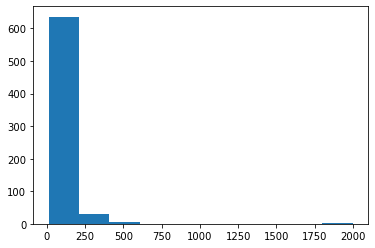

In [29]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots()
ax.hist(df_searched.price)
plt.show()



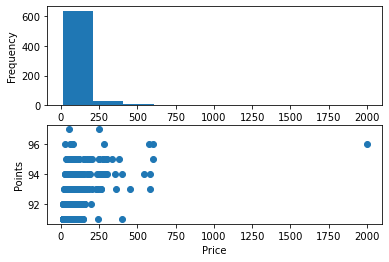

In [41]:
fig = plt.figure()

# histogram
ax1 = fig.add_subplot(211, ylabel="Frequency")
ax1.hist(df_searched.price)

# scatter
ax2 = fig.add_subplot(212,  xlabel="Price", ylabel="Points")
ax2.scatter(df_searched.price,df_searched.points)


plt.show()

# 正規表現

In [5]:
q3 = 'description.str.contains("\d{2}\sseconds", regex=True)'        # 風味を秒数で表現しているもの

df_searched_2 = df \
               .query(q3, engine='python')

print(df_searched_2.shape)
df_searched_2.head()


(8, 13)


country                                        description  \
17998         US  The aromas pop, with notes of orange peel, emb...   
19025         US  This suave and sophisticated wine is so smooth...   
37876  Australia  Dense all the way, from the dark, almost black...   
75915         US  Ripe flavors and a plush texture have not gone...   
88697         US  Concentrated, silky smooth and subtly complex,...   

                                    designation  points  price  \
17998                                Old Stones      94   50.0   
19025                      Methode A L'Ancienne      93   32.0   
37876  Bethany Creek Vineyard - Limited Reserve      93   30.0   
75915                                       NaN      91   12.0   
88697                       Sangiacomo Vineyard      94   48.0   

              province                 region_1         region_2  \
17998       Washington  Walla Walla Valley (WA)  Columbia Valley   
19025       California          Anderson Valley              NaN   
37876  South Australia           Barossa Valley              NaN   
75915       California               Clarksburg   Central Valley   
88697       California                 Carneros      Napa-Sonoma   

            taster_name taster_twitter_handle  \
17998  Sean P. Sullivan         @wawinereport   
19025        Jim Gordon      @gordone_cellars   
37876               NaN                   NaN   
75915        Jim Gordon      @gordone_cellars   
88697        Jim Gordon      @gordone_cellars   

                                                   title             variety  \
17998  Waters 2014 Old Stones Syrah (Walla Walla Vall...               Syrah   
19025  Navarro 2015 Methode A L'Ancienne Pinot Noir (...          Pinot Noir   
37876  Heritage Road 1999 Bethany Creek Vineyard - Li...  Cabernet Sauvignon   
75915        The White Knight 2013 Viognier (Clarksburg)            Viognier   
88697  Saxon Brown 2012 Sangiacomo Vineyard Chardonna...          Chardonnay   

                 winery  
17998            Waters  
19025           Navarro  
37876     Heritage Road  
75915  The White Knight  
88697       Saxon Brown

# Animation

In [104]:
%matplotlib notebook
import os
import random as rn
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anm
from PIL import Image, ImageDraw
from IPython import display 


# fix seeds
os.environ['PYTHONHASHSEED'] = '1234'
np.random.seed(1234)
rn.seed(1234)

# high resolution sound
fs = 48000
duration = 120 #[sec]
n = fs*duration

samp: list[float] = np.random.uniform(-1,1,n)
print(samp)

# plot
fig = plt.Figure()
window_size = 100
window_step = 50

def plot_anim(pnt):
    plt.cla()
    ax1 = fig.add_subplot(xlabel="Sample")
    img = ax1.plot(samp[pnt:pnt+100])
#--

anim = anm.FuncAnimation(fig,plot_anim)
anim.save("output.gif", writer="pillow")

[-0.6169611   0.24421754 -0.12454452 ...  0.93027172 -0.55794542
 -0.72969365]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [100]:
print(len(frames))
anim = anm.ArtistAnimation(fig,frames, interval=10)
plt.show()
anim.save("output.gif", writer="pillow")

20
